In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [2]:
# Load the dataset
data = pd.read_csv('Social_Network_Ads.csv')
print(data.head())
print()
print(data.tail())

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0

      User ID  Gender  Age  EstimatedSalary  Purchased
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1


In [3]:
# Selecting features and target variable
X = data[['Age', 'EstimatedSalary']]
y = data['Purchased']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
# Training the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [5]:
# Making predictions on the test set
y_pred = model.predict(X_test)

In [6]:
# Calculating evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Accuracy: 0.85
Precision: 0.94
Recall: 0.66
F1-score: 0.78


Confusion Matrix:
[[71  2]
 [16 31]]


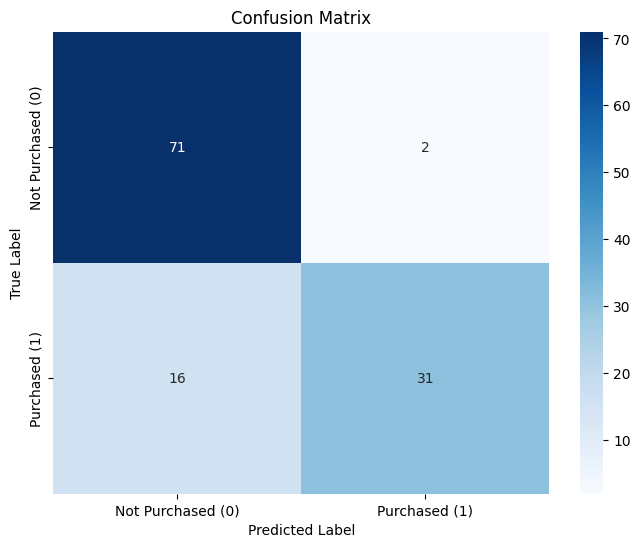

In [7]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
import seaborn as sns
# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Purchased (0)', 'Purchased (1)'], 
            yticklabels=['Not Purchased (0)', 'Purchased (1)'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

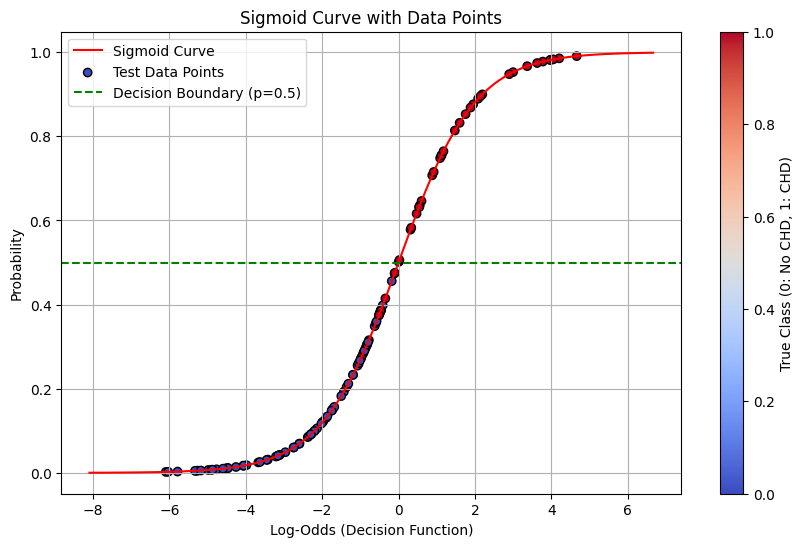

In [8]:
# SIGMOID CURVE FOR LOGISTIC REGRESSION 
log_odds_test = model.decision_function(X_test)

probabilities_test = model.predict_proba(X_test)[:, 1]

# Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


log_odds_range = np.linspace(min(log_odds_test) - 2, max(log_odds_test) + 2, 100)  # Range of log-odds
probabilities_range = sigmoid(log_odds_range)  # Apply sigmoid function

# Plot the sigmoid curve
plt.figure(figsize=(10, 6))
plt.plot(log_odds_range, probabilities_range, color='red', label='Sigmoid Curve')

# Scatter plot of the test data points
plt.scatter(log_odds_test, probabilities_test, c=y_test, cmap='coolwarm', edgecolors='k', label='Test Data Points')

# Add decision boundary (p = 0.5)
plt.axhline(y=0.5, color='green', linestyle='--', label='Decision Boundary (p=0.5)')

# Add labels and title
plt.xlabel('Log-Odds (Decision Function)')
plt.ylabel('Probability')
plt.title('Sigmoid Curve with Data Points')
plt.legend()
plt.grid(True)
plt.colorbar(label='True Class (0: No CHD, 1: CHD)')
plt.show()

In [9]:
# Function to plot decision boundary
from matplotlib.colors import ListedColormap
def plot_decision_boundary(X, y, classifier, title):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                         np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
    plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha=0.75, cmap=ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c=ListedColormap(('red', 'green'))(i), label=j)
    plt.title(title)
    plt.xlabel('Age (scaled)')
    plt.ylabel('Estimated Salary (scaled)')
    plt.legend()
    plt.show()

C:\Users\Neelanshu M\AppData\Local\Temp\ipykernel_1076\1411305164.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


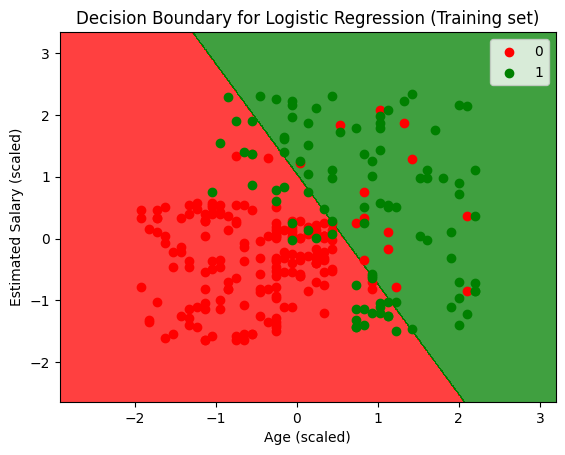

In [10]:
# Plot decision boundary for the training set
plot_decision_boundary(X_train, y_train, model, title='Decision Boundary for Logistic Regression (Training set)')

C:\Users\Neelanshu M\AppData\Local\Temp\ipykernel_1076\1411305164.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


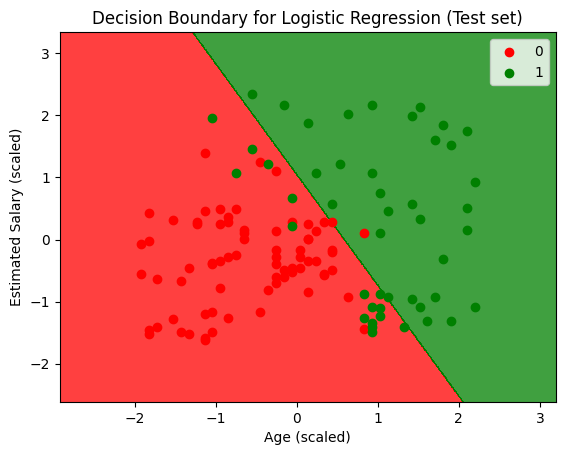

In [11]:
plot_decision_boundary(X_test, y_test, model, title='Decision Boundary for Logistic Regression (Test set)')

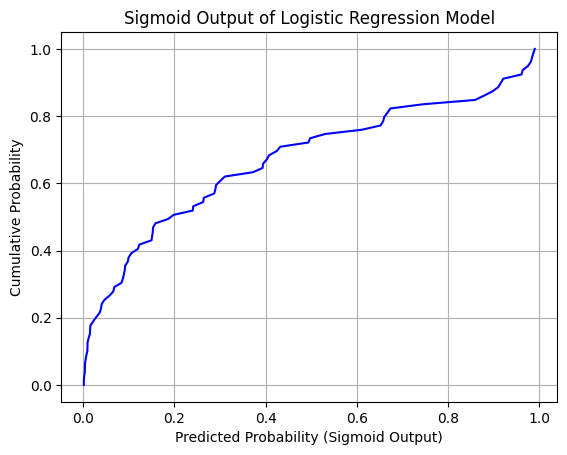

In [12]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Assuming X and y are already defined (features and target variable)
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform the training data
X_test_scaled = scaler.transform(X_test)       # Transform the test data

# Train the Logistic Regression model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train)  # Train the model on the scaled training data

# Predict probabilities for the test set
y_pred_proba = logreg.predict_proba(X_test_scaled)[:, 1]  # Get probabilities for class 1

# Plot the predicted probabilities (sigmoid output)
plt.plot(np.sort(y_pred_proba), np.linspace(0, 1, len(y_pred_proba)), color='blue')
plt.xlabel('Predicted Probability (Sigmoid Output)')
plt.ylabel('Cumulative Probability')
plt.title('Sigmoid Output of Logistic Regression Model')
plt.grid(True)
plt.show()